In [1]:
import numpy as np
import matplotlib

import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.mlab as mlab
import glob
from scipy import optimize
from scipy.special import erf
import os
import numpy.polynomial.polynomial as poly
from scipy.stats import chisquare
from collections import OrderedDict

from collections import OrderedDict
import matplotlib.patches as mpatches


In [2]:
##################################################################
# [Percent Xe, Efield, Pressure, Drift time, Sigma, Marker]
##################################################################
Data = np.load("XenonHelium.npy")
#Data = np.loadtxt("XenonHelium.txt")

In [3]:
vals = Data[:,:-1].astype(float)
mark = Data[:,-1]

In [4]:
Percents = np.unique(vals[:,0])
Percents

array([ 80.,  85.,  90., 100.])

In [5]:
COL =['b','g','r','m','y','c','k','lime','orange','steelblue','pink','blue']


In [6]:
YYY = np.array([0.89613526, 1.0112077 , 1.0816289 , 1.13770822, 1.18708917,
       1.23178338])
XXX = np.array([ 50., 100., 150., 200., 250., 300.])

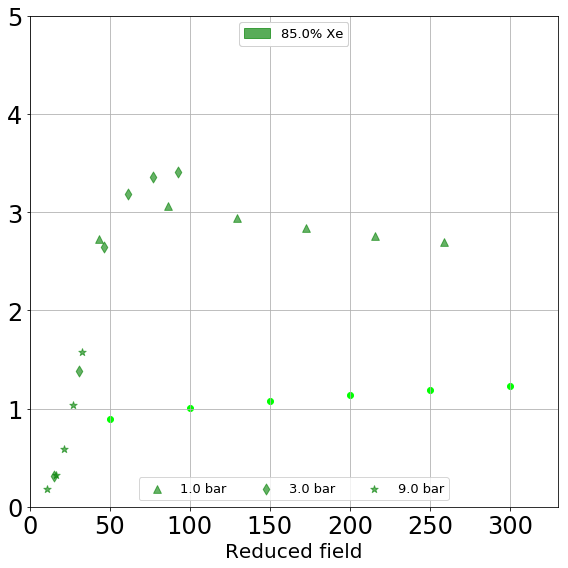

In [9]:
Pat = []
plt.figure(figsize=(8,8))
#for x in range(0,len(Percents)):
for x in [1]:
    Pc = Percents[x]
    DATA = Data[Data[:,0].astype(float)==Pc]
    vals = DATA[:,:-1].astype(float)
    mark = DATA[:,-1]
    d = 134.8
    P = vals[:,2]
    E = vals[:,1]
    dt = vals[:,3]*1e6
    V = d/(dt)
    R = E/P
    lab = str(Pc)+'% Xe'
    color = COL[x]
    pat = mpatches.Patch(color=color,    label=lab,alpha=0.6)
    Pat.append(pat)
    LABB = np.rint(P).astype(str)
    
    for x, y, m, L in zip(R, V, mark,LABB):
        plt.scatter(x, y, alpha=0.6,marker=m,color=color,s=60,label=L+" bar") 
    
    
handles, labels = plt.gca().get_legend_handles_labels()
by_label = OrderedDict(zip(labels, handles))
legend2=plt.legend(by_label.values(), by_label.keys(),loc='lower center',ncol=3,fontsize=13)

legend1=plt.legend(handles=Pat,loc='upper center',ncol=5,fontsize=13)
plt.gca().add_artist(legend1)
plt.gca().add_artist(legend2)

plt.scatter(XXX,YYY,color='lime')
plt.xlim(0,330)#
#plt.xlim(0,50)

plt.ylim(0,5)#
#plt.xlim(0,100)#
#plt.legend(loc='upper right',fontsize=14,ncol=3)
plt.xticks(fontsize=24)
plt.yticks(fontsize=24)
plt.grid()
plt.xlabel("Reduced field",fontsize=20)
#plt.ylabel(r" Dl   ($\sqrt{bar} \mu m / \sqrt{cm}$)",fontsize=20)
#plt.ylabel(r" $Dl^*$    ($\sqrt{bar} cm / \sqrt{cm}$)",fontsize=20)
plt.tight_layout()
#plt.savefig("/Users/austinmcdonald/Desktop/DslashSTARBAR"+".png")
plt.show()

In [131]:
V

array([0.89613526, 1.0112077 , 1.0816289 , 1.13770822, 1.18708917,
       1.23178338])

In [133]:
P

array([1., 1., 1., 1., 1., 1.])

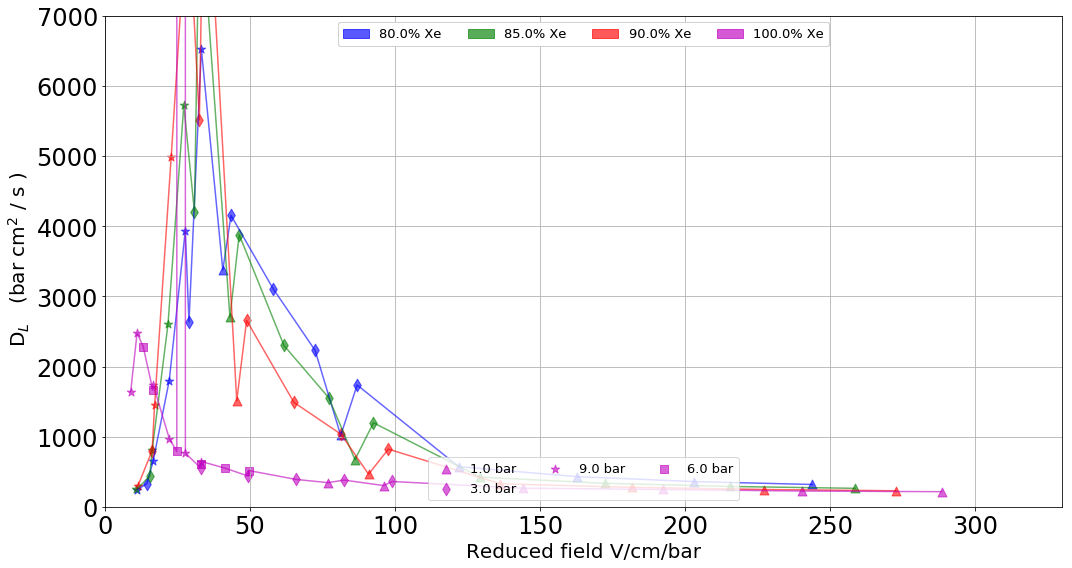

In [175]:
Pat = []
plt.figure(figsize=(15,8))
for x in range(0,len(Percents)):
#for x in [-1]:
    Pc = Percents[x]
    DATA = Data[Data[:,0].astype(float)==Pc]
    vals = DATA[:,:-1].astype(float)
    mark = DATA[:,-1]
    d = 13.48
    E = vals[:,1]
    P = vals[:,2]
    dt = vals[:,3]*1e6
    sigma = (vals[:,4]*1e6)**2
    V = d/(dt)
    R = E/P
    Dslash = sigma*V**3/(2*d)*1e6*P
    SORT = R.argsort()
    lab = str(Pc)+'% Xe'
    color = COL[x]
    pat = mpatches.Patch(color=color,    label=lab,alpha=0.6)
    Pat.append(pat)
    LABB = np.rint(P).astype(str)
    
    plt.plot(R[SORT], Dslash[SORT], alpha=0.6,color=color)
    for x, y, m, L in zip(R, Dslash, mark,LABB):
        plt.scatter(x, y, alpha=0.6,marker=m,color=color,s=80,label=L+" bar") 
    
handles, labels = plt.gca().get_legend_handles_labels()
by_label = OrderedDict(zip(labels, handles))
legend2=plt.legend(by_label.values(), by_label.keys(),loc='lower center',ncol=3,fontsize=13)

legend1=plt.legend(handles=Pat,loc='upper center',ncol=5,fontsize=13)
plt.gca().add_artist(legend1)
plt.gca().add_artist(legend2)


plt.xlim(0,330)#
plt.ylim(0,7000)#
#plt.legend(loc='upper right',fontsize=14,ncol=3)
plt.xticks(fontsize=24)
plt.yticks(fontsize=24)
plt.grid()
plt.xlabel("Reduced field V/cm/bar",fontsize=20)
plt.ylabel(r" D$_L$   (bar cm$^2$ / s )",fontsize=20)
plt.tight_layout()
#plt.savefig("/Users/austinmcdonald/Desktop/DslashSTARBAR"+".png")
plt.show()

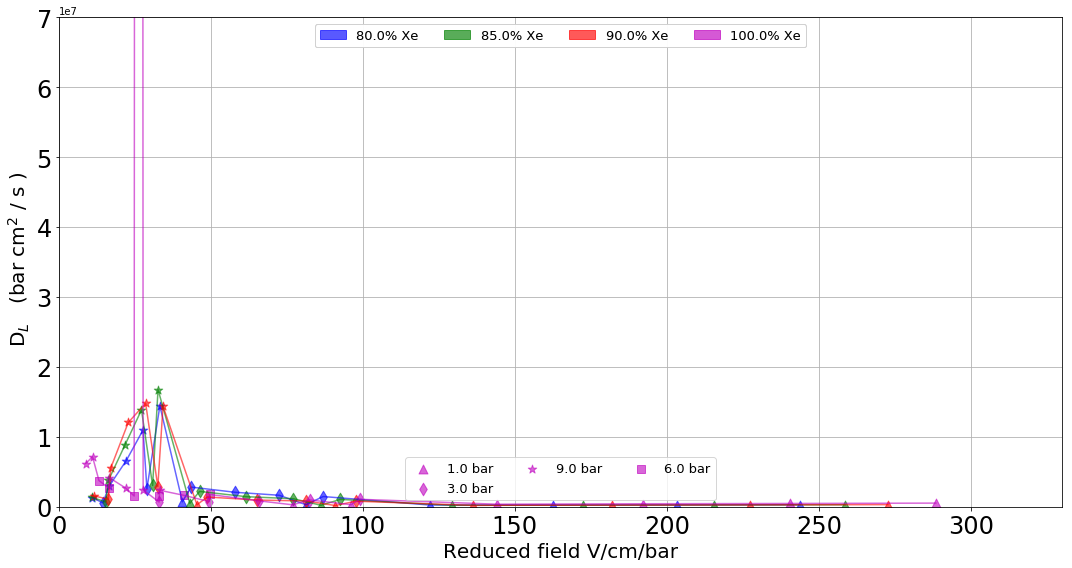

In [186]:
Pat = []
plt.figure(figsize=(15,8))
for x in range(0,len(Percents)):
#for x in [1]:
    Pc = Percents[x]
    DATA = Data[Data[:,0].astype(float)==Pc]
    vals = DATA[:,:-1].astype(float)
    mark = DATA[:,-1]
    d = 13.48
    E = vals[:,1]
    P = vals[:,2]
    dt = vals[:,3]*1e6
    sigma = (vals[:,4]*1e6)**2
    V = d/(dt)
    R = E/P
    Dslash = sigma*V**3/(2*d)*1e6*P
    Dmu = Dslash/(V/E)
    SORT = R.argsort()
    lab = str(Pc)+'% Xe'
    color = COL[x]
    pat = mpatches.Patch(color=color,    label=lab,alpha=0.6)
    Pat.append(pat)
    LABB = np.rint(P).astype(str)
    
    plt.plot(R[SORT], Dmu[SORT], alpha=0.6,color=color)
    for x, y, m, L in zip(R, Dmu, mark,LABB):
        plt.scatter(x, y, alpha=0.6,marker=m,color=color,s=80,label=L+" bar") 
    
handles, labels = plt.gca().get_legend_handles_labels()
by_label = OrderedDict(zip(labels, handles))
legend2=plt.legend(by_label.values(), by_label.keys(),loc='lower center',ncol=3,fontsize=13)

legend1=plt.legend(handles=Pat,loc='upper center',ncol=5,fontsize=13)
plt.gca().add_artist(legend1)
plt.gca().add_artist(legend2)


plt.xlim(0,330)#
plt.ylim(0,70000000)#
#plt.legend(loc='upper right',fontsize=14,ncol=3)
plt.xticks(fontsize=24)
plt.yticks(fontsize=24)
plt.grid()
plt.xlabel("Reduced field V/cm/bar",fontsize=20)
plt.ylabel(r" D$_L$   (bar cm$^2$ / s )",fontsize=20)
plt.tight_layout()
#plt.savefig("/Users/austinmcdonald/Desktop/DslashSTARBAR"+".png")
plt.show()

In [166]:
sigma

array([9.77756817e+00, 7.80315608e+00, 5.57378190e+00, 4.43132057e+00,
       3.54384528e+00, 3.04054893e+00, 1.00834080e+04, 8.92251202e+00,
       5.67124516e+00, 4.34899068e+00, 3.73954362e+00, 3.13537671e+00,
       8.80662644e+01, 2.99057285e+01, 7.82818566e+00, 4.99121683e+00,
       3.98538210e+00, 3.41466954e+00, 5.17622317e+02, 1.78925149e+02,
       2.09943737e+01, 7.15296293e+00, 4.61038374e+00, 3.48001446e+00])

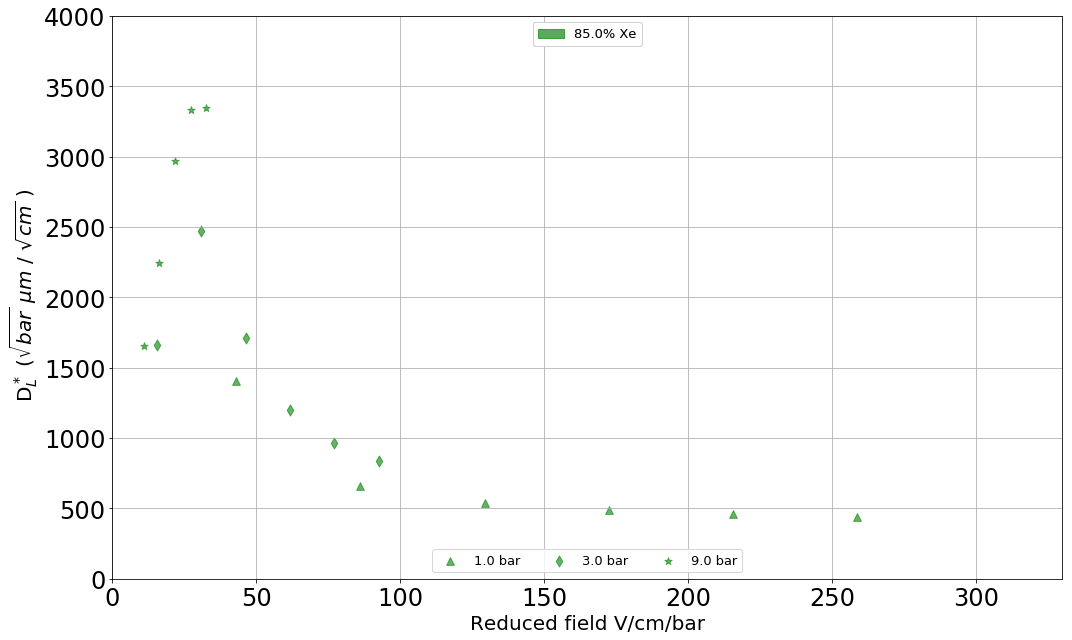

In [12]:
Pat = []
plt.figure(figsize=(15,9))
#for x in range(0,len(Percents)):
for x in [1]:
    Pc = Percents[x]
    DATA = Data[Data[:,0].astype(float)==Pc]
    vals = DATA[:,:-1].astype(float)
    mark = DATA[:,-1]
    d = 13.48
    E = vals[:,1]
    P = vals[:,2]
    dt = vals[:,3]*1e6
    sigma = (vals[:,4]*1e6)**2
    V = d/(dt)
    R = E/P
    Dslash = sigma*V**3/(2*d)*1e6*P
    Dstar  = np.sqrt(2*Dslash/V)*10
    SORT = R.argsort()
    lab = str(Pc)+'% Xe'
    color = COL[x]
    pat = mpatches.Patch(color=color,    label=lab,alpha=0.6)
    Pat.append(pat)
    LABB = np.rint(P).astype(str)
    
    #plt.plot(R[SORT], Dstar[SORT], alpha=0.6,color=color)
    for x, y, m, L in zip(R, Dstar, mark,LABB):
        plt.scatter(x, y, alpha=0.6,marker=m,color=color,s=60,label=L+" bar") 
    
    
handles, labels = plt.gca().get_legend_handles_labels()
by_label = OrderedDict(zip(labels, handles))
legend2=plt.legend(by_label.values(), by_label.keys(),loc='lower center',ncol=3,fontsize=13)

legend1=plt.legend(handles=Pat,loc='upper center',ncol=5,fontsize=13)
plt.gca().add_artist(legend1)
plt.gca().add_artist(legend2)


plt.xlim(0,330)#
#plt.xlim(0,50)

#plt.xlim(0,120)#
plt.ylim(0,4000)#
#plt.legend(loc='upper right',fontsize=14,ncol=3)
plt.xticks(fontsize=24)
plt.yticks(fontsize=24)
plt.grid()
plt.xlabel("Reduced field V/cm/bar",fontsize=20)
plt.ylabel(r" D$^*_L$ ($\sqrt{bar}$ $\mu m$ / $\sqrt{cm}$ )",fontsize=20)
plt.tight_layout()
#plt.savefig("/Users/austinmcdonald/Desktop/DslashSTARBAR"+".png")
plt.show()

In [64]:
P

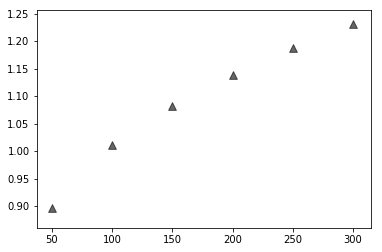

In [55]:
for Pc in [100]:
    DATA = Data[Data[:,0].astype(float)==Pc]
    vals = DATA[:,:-1].astype(float)
    mark = DATA[:,-1]
    d = 134.8
    V = d/(vals[:,3]*1e6)
    R = vals[:,1]/vals[:,2]
    
    #plt.scatter(R,V)
    
    for x, y, m in zip(R, V, mark):
        plt.scatter(x, y, alpha=0.6,marker=m,color='k',s=60) 
    
    

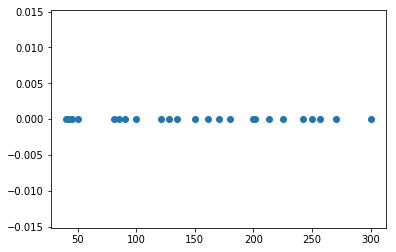

In [46]:
plt.scatter(vals[:,1]/vals[:,2],vals[:,4])

In [23]:
Data[Data[:,0]==80]

/Users/austinmcdonald/miniconda/envs/IC-3.6-2018-11-14/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  """Entry point for launching an IPython kernel.


array([], shape=(0, 24, 6), dtype='<U32')

In [14]:
Data[:,0]

array(['80', '80', '80', '80', '80', '80', '85', '85', '85', '85', '85',
       '85', '90', '90', '90', '90', '90', '90', '100', '100', '100',
       '100', '100', '100'], dtype='<U32')

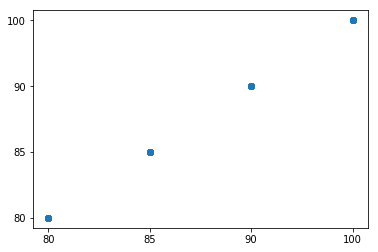

In [8]:
plt.scatter(Data[:,0],Data[:,0])